# TensorFlow - Logistical Regression
The MNIST database (Mixed National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. When one learns how to program, there's a tradition that the first thing you do is print "Hello World." Just like programming has Hello World, machine learning has MNIST.

MNIST is a simple computer vision dataset. It consists of images of handwritten digits like these:
<img src="image/MNIST.png">
It also includes labels for each image, telling us which digit it is. For example, the labels for the above images are 5, 0, 4, and 1.

<img src="image/image.png">

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
from tensorflow.examples.tutorials.mnist import input_data
%matplotlib inline

In [2]:
epochs = 1000
learning_rate = 0.5

# Load Data and Labels
The MNIST data is split into three parts: 

- 55,000 data points of training data (mnist.train)
- 10,000 points of test data (mnist.test)
- 5,000 points of validation data (mnist.validation). 

In [3]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
print (mnist.train.images.shape)
print (mnist.train.labels.shape)

(55000, 784)
(55000, 10)


In [5]:
print (mnist.test.images.shape)
print (mnist.test.labels.shape)

(10000, 784)
(10000, 10)


# Data Visualization

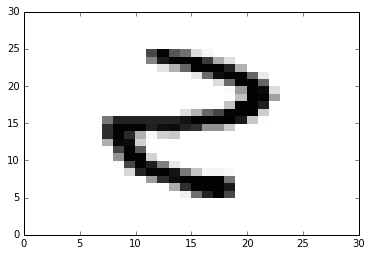

In [12]:
pcolor(mnist.train.images[10000].reshape(28,28), cmap=plt.cm.gray_r)

In [14]:
print (mnist.train.images[10000].reshape(28,28)[20:25,5:10])
print ("Label")
print (mnist.train.labels[10000])

[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]
Label
[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


# "one-hot" format to present labels
- 0 = [1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]
- 1 = [0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]
- 2 = [0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]
- 3 = [0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]
- 4 = [0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.]
- 5 = [0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.]
- 6 = [0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.]
- 7 = [0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.]
- 8 = [0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.]
- 9 = [0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]

In [15]:
# Create the model
x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, [None, 10])

W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x, W) + b)

In [16]:
# Define loss and optimizer
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [17]:
# TensorFlow Innitialization
init = tf.initialize_all_variables()

In [18]:
errors = []
with tf.Session() as sess:
        sess.run(init)
        for i in range(epochs):
            batch_xs, batch_ys = mnist.train.next_batch(100)
            _, cross_entropy_value, y_value = sess.run([optimizer, cross_entropy, y], feed_dict={x: batch_xs, y_: batch_ys})
            accuracy_value = sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels})
            errors.append(1-accuracy_value)
        print (errors[-1])

0.08109998703


/Users/paulrad/anaconda/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


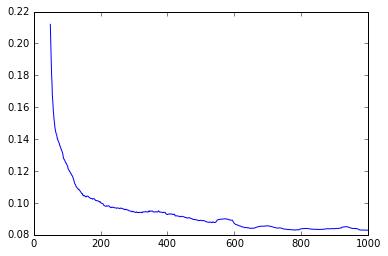

In [19]:
plt.plot([np.mean(errors[i-50:i]) for i in range(len(errors))])
plt.show()           